<a href="https://colab.research.google.com/github/jonathanhicks97/MLTSA22_JHicks/blob/main/HW6/HW6_Ilya_Tyagin_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red">FBB this was well done technically, and you commented thoughtfully on some things, but I need you to be more clear and accurate in uyour comments. What does "ok-ish mean? From your comments I am exploring the depth of your understanding and ok-ish does not give me a lot to work with</font>

In [ ]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
%pylab inline




     |████████████████████████████████| 991 kB 5.1 MB/s 
Populating the interactive namespace from numpy and matplotlib


# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

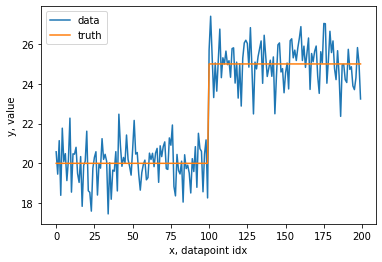

In [ ]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x, datapoint idx")
pl.ylabel("y, value")
pl.legend();

**Plot: Syntetic data created with 2 Gaussian  stationary processes with 2 different mean values. Orange line shows the overall mean value and its point of change.**

<font color="red"> FBB ok</font>

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [ ]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(y[i:]) -  f(y[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(y[:i]), f(y[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before: 19.98, mean after: 25.06


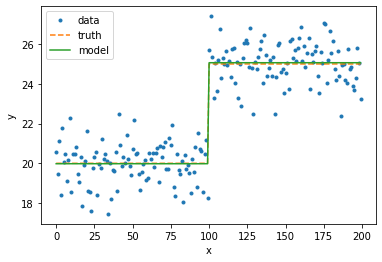

In [ ]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

**Plot: Same data as on the prev figure, but now we add the 3rd line (green) showing the predicted mean value change based on max difference in the means before and after the POC. This model did a great job and correctly predicted POC!**

<font color="red"> FBB ok</font>

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa22_6#/6/2) a single POC and maximizing the differencem in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

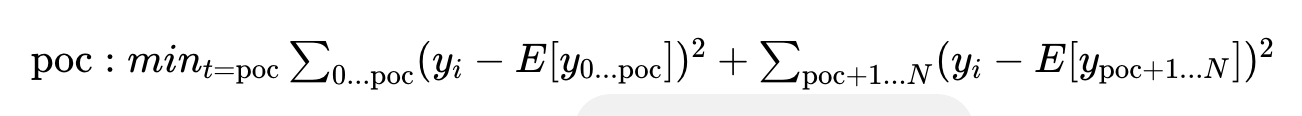

In [ ]:
def poc_mse(y):
    """calculates the POC as the points that minimizes 
    the difference between MSE before and after the POC
    
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    #poc, diff, before, after = 0, 0, np.nan, np.nan
    poc, mse, before, after = 0, np.inf, np.nan, np.nan

    #start_end_cutoff = int(0.1 * N)

    for i in range(1, N):
        diff_here = np.abs(f(y[i:]) -  f(y[:i]))

        #print(f"step: {i}, len_before: {len(y[:i])}, len_after: {len(y[i:])}")

        #MSE
        mse_before = f(
            [
              (y[i] - np.mean(y[:i])) ** 2 for i in range(0,i)
            ]
        )
        mse_after  = f(
            [
              (y[i] - np.mean(y[i:])) ** 2 for i in range(i,N)
            ]
        )

        #print(f"step {i}: ", mse_before, mse_after)

        total_mse_here = mse_before + mse_after

        if mse > total_mse_here:
          #print('Good mse!')
          mse = total_mse_here
          poc = i
          before, after = f(y[:i]), f(y[i:])
    return(poc, before, after)  

In [ ]:
print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


poc: 100.00, mean before: 19.98, mean after: 25.06


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


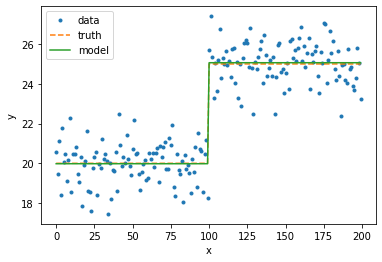

In [ ]:
poc, before, after = poc_mse(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

**Plot: Same data as on the prev figure, but now the 3rd line (green) shows the predicted mean value change based on function minimizing the difference between MSE before and after the POC. This model did a great job and correctly predicted POC! (again)**

<font color="red"> FBB ok</font>

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(\sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the different in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function shoudl still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


In [ ]:
mu1, mu2 = 20, 25
s2 = 4
ys = np.concatenate([np.random.randn(100)  + mu1 , np.random.randn(100) * s2 + mu1])

In [ ]:
def maxdiff(y, sigma=False):
    """calculates the POC as the points that maximized the difference between 
                the mean or variance before and the mean after the POC
    
    y: vector of endogenouos variables 
    sigma: finds the POC that maximizes the difference between before/after POC variance 
                (optional, default is before/after mean)
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan

    if sigma:
      def f(x):
        return sqrt(np.var(x))
    
    # we have to use cutoff because the diff between variance on the edges 
    # may become unreasonably high
    
    start_end_cutoff = int(0.1 * N)

    for i in range(1 + start_end_cutoff, N-start_end_cutoff):
      diff_here = np.abs(f(y[i:]) -  f(y[:i]))
      if diff < diff_here:
          diff = diff_here
          poc = i
          before, after = f(y[:i]), f(y[i:])
          #print(i, before, after, diff_here)
    return (poc, before, after)

In [ ]:
print("poc: {:.2f}, standard deviation before: {:.2f}, after: {:.2f}".format(*maxdiff(ys, 
                                                                    sigma=True)))

poc: 101.00, standard deviation before: 0.88, after: 3.87


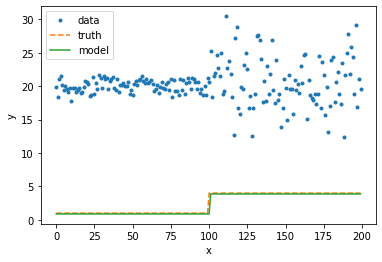

In [ ]:
poc, before, after = maxdiff(ys, sigma=True)   
pl.plot(x, ys, '.', label="data")
pl.plot(range(200), [1] * 100 + [4] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

**Plot: Data was generated as 200 points by two Gaussian stationary processes that had 100 points each with means 20 and variance 1 and 4 respectively. This time the model was made to choose the POC that maximizes the difference in standard deviation, instead of mean value. As we can see, it correctly identified POC.**

<font color="red"> FBB ok</font>

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

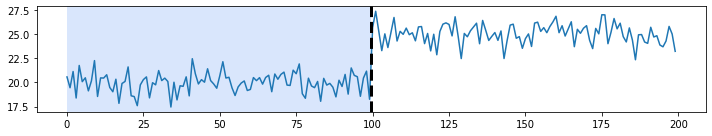

CPU times: user 315 ms, sys: 113 ms, total: 428 ms
Wall time: 377 ms


In [ ]:
%%time
# detection
algo = rpt.Pelt(model='l1', min_size=100).fit(ym)
result = algo.predict(pen=0.9)

# display
rpt.display(ym, [100], result)
pl.show()

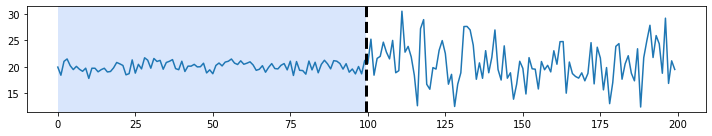

CPU times: user 332 ms, sys: 163 ms, total: 494 ms
Wall time: 491 ms


In [ ]:
%%time
# detection
algo = rpt.Pelt(model='l2', min_size=100).fit(ys)
result = algo.predict(pen=0.4)

# display
rpt.display(ys, [100], result)
pl.show()

**Plots: Finding POC with rupture python package. We used different synthetic data from the previous experiments with Pelt (Linearly penalized segmentation) method with 2 different models: `l1` and `l2`, which are based on different penalty functions. Penalty values were found imperically (as you can see, Pelt method is quite fast)**

<font color="red"> FBB ok (empirically) - you should state your choice of penalty here</font>

# read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [ ]:
!wget http://fbb.space/mltsa/LALNeq.csv

--2022-04-05 02:40:07--  http://fbb.space/mltsa/LALNeq.csv
Resolving fbb.space (fbb.space)... 107.180.39.232
Connecting to fbb.space (fbb.space)|107.180.39.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113902284 (109M) [text/csv]
Saving to: ‘LALNeq.csv.1’

LALNeq.csv.1        100%[===================>] 108.62M  35.4MB/s    in 3.2s    

2022-04-05 02:40:11 (33.9 MB/s) - ‘LALNeq.csv.1’ saved [113902284/113902284]



In [ ]:
eq1 = pd.read_csv('LALNeq.csv')[['acoustic_data', 'time_to_failure']]
eq1.describe()

,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06
mean,4.616407e+00,8.852012e-01
std,2.614006e+01,3.374432e-01
min,-4.621000e+03,3.008971e-01
25%,2.000000e+00,5.934956e-01
50%,5.000000e+00,8.849986e-01
75%,7.000000e+00,1.177597e+00
max,3.252000e+03,1.469100e+00


In [ ]:
eq1.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


# using rupture

Go through the documentation of rupture. 

Look at the "cost functions" and "search methos" tab here - https://centre-borelli.github.io/ruptures-docs/user-guide/ and the paper https://arxiv.org/pdf/1801.00718.pdf to find the computational cost associate to each method (Section 5).

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively (make a plot for each and discuss each in the caption)




Look at the "cost functions" and "search methos" tab here - https://centre-borelli.github.io/ruptures-docs/user-guide/ and the paper https://arxiv.org/pdf/1801.00718.pdf to find the computational cost associate to each method.





**Method having computational complexity  O(kN^2) is dynamic programming (https://centre-borelli.github.io/ruptures-docs/user-guide/detection/dynp/).**

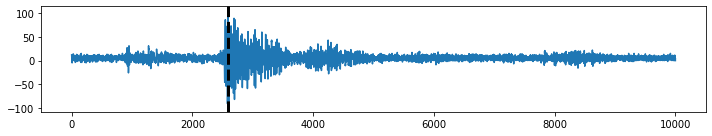

In [ ]:
model = 'l2'
algo1 = rpt.Dynp(model=model).fit(
    eq1.acoustic_data.values[:10000]
)
result = algo1.predict(n_bkps=1)

# display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
plt.show()

**Plot: Finding POC with rupture python package. We used real LANL earthquake prediction data (first $N=10000$ points) and Dynamic Programming model with `l2` cost function (a piecewise constant model). `n_bkps` parameter defines the number of POC to detect.**

<font color="red"> FBB note that you actually missed the start of the earthquake by a bit, which if you were doing earthquake predictions could be catastrophic</font>

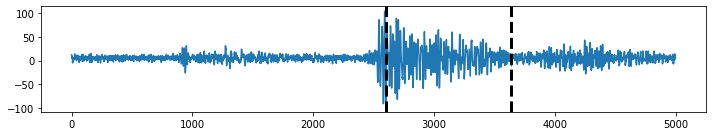

CPU times: user 5.85 s, sys: 421 ms, total: 6.27 s
Wall time: 5.92 s


In [ ]:
%%time
model = 'l2'
algo2 = rpt.Dynp(model=model, min_size=1000).fit(
    eq1.acoustic_data.values[:5000]
)
result = algo2.predict(n_bkps=2)

# display
rpt.display(eq1.acoustic_data.values[:5000], [], result)
plt.show()

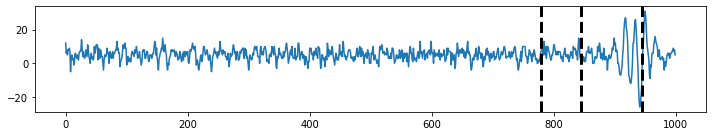

CPU times: user 2 s, sys: 150 ms, total: 2.15 s
Wall time: 2.13 s


In [ ]:
%%time
model = 'l2'
algo3 = rpt.Dynp(model=model, min_size=50).fit(
    eq1.acoustic_data.values[:1000]
)
result = algo3.predict(n_bkps=3)

# display
rpt.display(eq1.acoustic_data.values[:1000], [], result)
plt.show()

**Plots: Finding POC with rupture python package. We used real LANL earthquake prediction data (first $N=5000$ and $N=1000$ points, respectively) and Dynamic Programming model with `l2` cost function (a piecewise constant model). `n_bkps` parameter defines the number of POC to detect (we used 2 and 3). `min_size` is used for subsampling: it's a constraint defining minimum distance between change points. It was found imperically to have (somewhat) reasonable results.**

<font color="red"> FBB things to note: in n_bkps = 2 you are missing the start of the change - which would very not ideal if you wanted to do earthquake _prediction_</font>

Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

**Method having computational complexity O(Nlog(N)) is binary segmenation (https://centre-borelli.github.io/ruptures-docs/user-guide/detection/binseg/).**

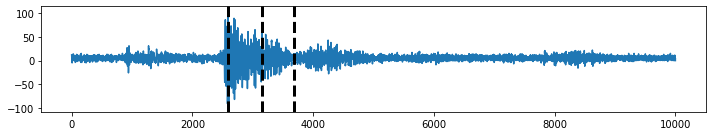

CPU times: user 1min 59s, sys: 2.09 s, total: 2min 1s
Wall time: 2min 8s


In [ ]:
%%time
model = 'l2'
algo4 = rpt.Dynp(model=model, min_size=500).fit(
    eq1.acoustic_data.values[:10000]
)
result = algo4.predict(n_bkps=3)

# display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
plt.show()

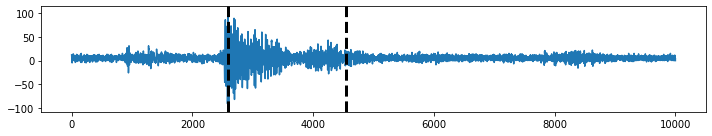

CPU times: user 1.12 s, sys: 120 ms, total: 1.24 s
Wall time: 1.27 s


In [ ]:
%%time
model = 'l2'
algo5 = rpt.Binseg(model=model, min_size=1000).fit(
    eq1.acoustic_data.values[:10000]
)
result = algo5.predict(n_bkps=2)

# display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
plt.show()

**Plots: Finding POC with rupture python package. We used real LANL earthquake prediction data (first $N=10000$ this time) and Dynamic Programming (`Dynp`) and binary segmenation (`Binseg`) models with `l2` cost function (a piecewise constant model). The goal was to isolate 3 chunks of time series, which 2 models managed to do okay-ish...I'm sure that with a proper parameter finetuning we could achieve better results, but they do the job as a proof of concept. Here we also can clearly see the difference in computational complexity between 2 models: `Binseg` runs substantially faster, which was clear from it's theoretical complexity O(nlogn).**

<font color="red"> FBB why ok-ish? what do you see? Share your thoughts about the plots - this will help me understand that you understand! running the model is the easy part - interpreting is the hard part</font>